## Data Salary Analysis

In [32]:
# Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [33]:
# passing our csv into a readable datafram

csv_file=Path("Data_Salaries_Final.csv")
data_final=pd.read_csv(csv_file)
data_final.head()

,Company Name,Rating,Role,Average Salary
0,Tata Consultancy Services,3.9,Data Scientist,780000.0
1,IBM,4.0,Data Scientist,1200000.0
2,Accenture,4.0,Data Scientist,1051857.0
3,Mu Sigma,3.5,Data Scientist,725000.0
4,Infosys,3.3,Data Scientist,770714.0


In [34]:
# There seem to be misspellings in the Row column and different names for a similar role. We will change that now before moving on to our analysis

data_final=data_final.replace({"Daata Scientist":"Data Scientist","Data Science":"Data Scientist","Data Scientiist":"Data Scientist",
                              "Data Scientistst":"Data Scientist","Data Sscientist":"Data Scientist","Data scientists":"Data Scientist",
                              "Data Science Analyst":"Data Analyst/Data Scientist","Director Data Science":"Director of Data Science",
                              "Jr. Data Scientist":"Junior Data Scientist","Manager - Data Scientist" : "Data Science Manager","Manager - Data Science":"Data Science Manager","Data Scientist Manager":"Data Science Manager",
                              "Sr. Data Scientist":"Senior Data Scientist","Sr Data Scientist": "Senior Data Scientist","Sr Manager Data Science":"Senior Manager Data Science",
                               "Data Scientist, Data Analyst, Machine Learning Engineer":"Machine Learning Engineer","Data Analyst | Data Scientist | Data Engineer":"Data Engineer"})


In [35]:
# Renaming columns to indicate currency of Average Salary in INR
data_final=data_final.rename(columns={"Average Salary":"Average Salary Per Annum (INR)"})

# In order to see how much the salary is in USD, we'll have to convert it. As of 2023, exchange rate is 1 INR = 0.012 USD

data_final["Average Salary Per Annum (USD)"]=round(data_final["Average Salary Per Annum (INR)"]*0.012,2)
data_final.head()

,Company Name,Rating,Role,Average Salary Per Annum (INR),Average Salary Per Annum (USD)
0,Tata Consultancy Services,3.9,Data Scientist,780000.0,9360.00
1,IBM,4.0,Data Scientist,1200000.0,14400.00
2,Accenture,4.0,Data Scientist,1051857.0,12622.28
3,Mu Sigma,3.5,Data Scientist,725000.0,8700.00
4,Infosys,3.3,Data Scientist,770714.0,9248.57


In [36]:
# Creating a summary analysis table to show us the mean, median, variance, standard deviation and standard error of the mean for salaries grouped by unique role.

grouped_df=data_final.groupby(["Role"])

summary_df=grouped_df["Average Salary Per Annum (USD)"].agg(['mean','median','max','min']).style.format('${0:,.2f}')
summary_df


,mean,median,max,min
Role,,,,
(Senior) Data Scientist,"$16,000.00","$16,800.00","$21,600.00","$9,600.00"
Applied Data Scientist,"$25,463.20","$14,478.00","$54,000.00","$10,800.00"
Associate Data Scientist,"$10,830.36","$9,600.00","$33,600.00","$2,400.00"
Chief Data Scientist,"$25,200.00","$20,400.00","$57,600.00","$6,000.00"
Clinical Data Scientist,"$12,790.95","$9,381.90","$26,400.00","$6,000.00"
Consultant Data Scientist,"$26,228.57","$22,800.00","$44,400.00","$16,800.00"
Customer Facing Data Scientist,"$30,000.00","$30,000.00","$40,800.00","$19,200.00"
Data Analyst/Data Scientist,"$12,617.48","$9,600.00","$110,400.00","$1,200.00"
Data Analyst/Junior Data Scientist,"$3,200.00","$3,600.00","$3,600.00","$2,400.00"


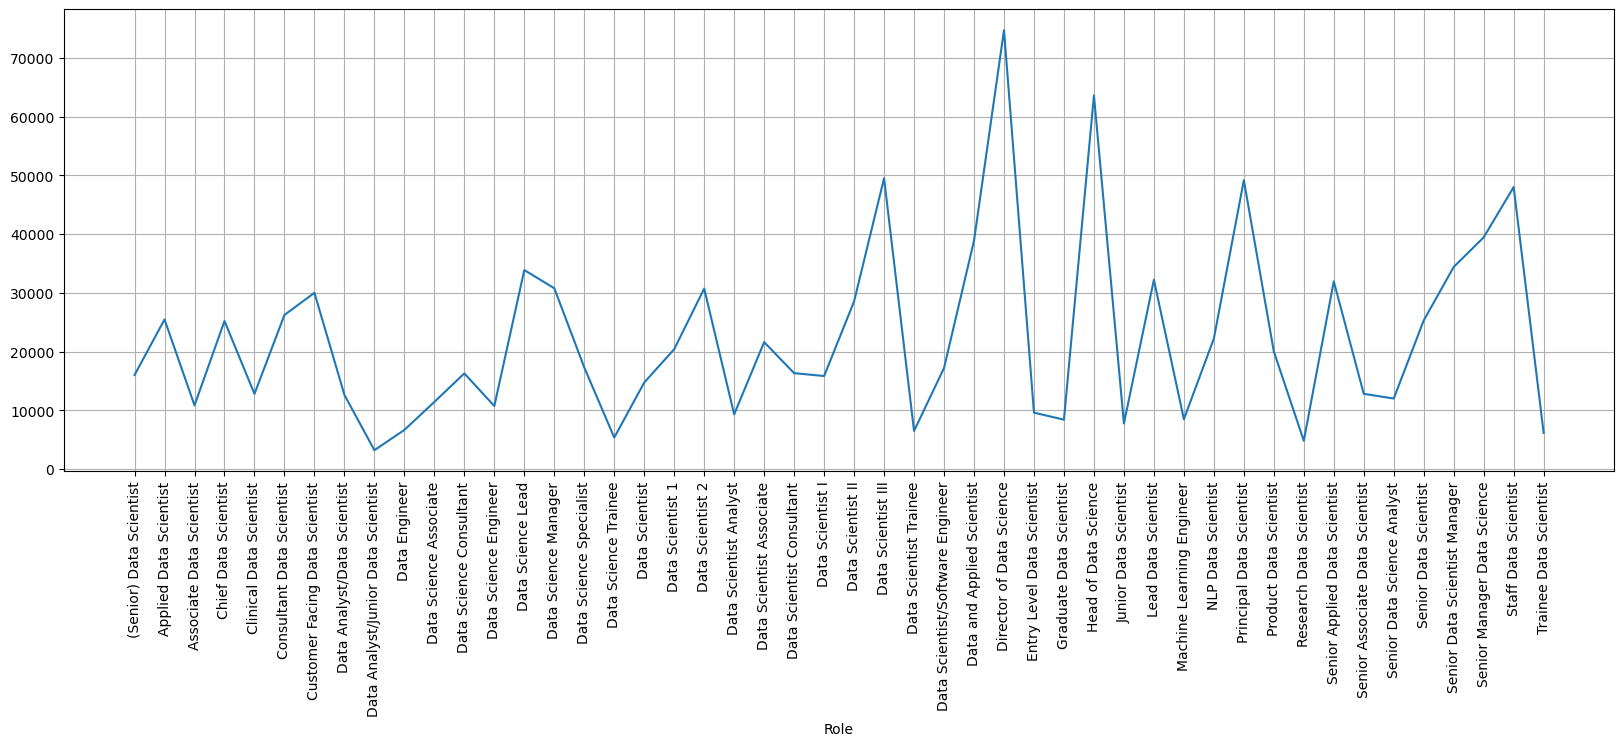

In [37]:
# Let's visualize this better on a line graph against the mean salary for each role

mean_df=grouped_df["Average Salary Per Annum (USD)"].mean()

plt.figure(figsize=(20,6))
mean_df.plot(kind="line", rot="vertical")

plt.xticks(rotation=90)

plt.gca().set_xticks(range(len(mean_df.index)))
plt.gca().set_xticklabels(mean_df.index)
plt.grid()
plt.show()